In [56]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
#import keras
#from keras.models import Sequential
#from keras.layers import Dense, Dropout, Reshape, Activation
#from keras.layers import Embedding
#from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D


import astropy
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.utils.data import get_pkg_data_filename
import scipy.signal as signal

from datetime import datetime
import os
from scipy.stats import moment

import corner


[     nan      nan      nan ... 95390.97 95321.87 95392.87]


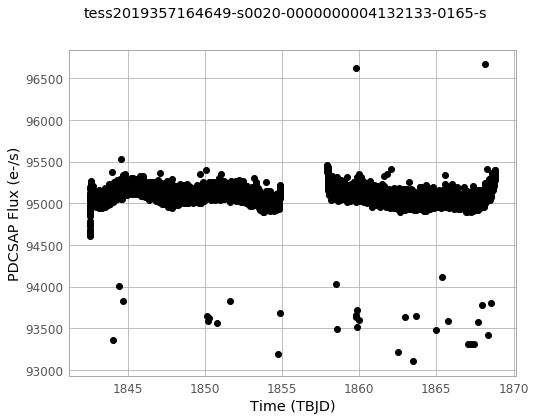

In [3]:
file = get_pkg_data_filename("/Users/conta/UROP_Spring_2020/tessdata_lc_sector20_1000/tess2019357164649-s0020-0000000004132133-0165-s_lc.fits")
#fits.info(file)
image_data = fits.getdata(file, ext=1)
fits.getdata(file, ext=1).columns
with fits.open(file, mode="readonly") as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    sap_flux = hdulist[1].data['SAP_FLUX']
    pdcsap_flux = hdulist[1].data['PDCSAP_FLUX']
print(pdcsap_flux)
fits.getdata(file, ext=1).columns
with fits.open(file, mode="readonly") as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    sap_flux = hdulist[1].data['SAP_FLUX']
    pdcsap_flux = hdulist[1].data['PDCSAP_FLUX']
    
#plotting
# Start figure and axis.
fig, ax = plt.subplots()

# Plot the timeseries in black circles.
ax.plot(tess_bjds, pdcsap_flux, 'ko')

# label the axes and define a title for the figure.
fig.suptitle("tess2019357164649-s0020-0000000004132133-0165-s")
ax.set_ylabel("PDCSAP Flux (e-/s)")
ax.set_xlabel("Time (TBJD)")
#ax.set_xlim(1850,1851)
plt.show()

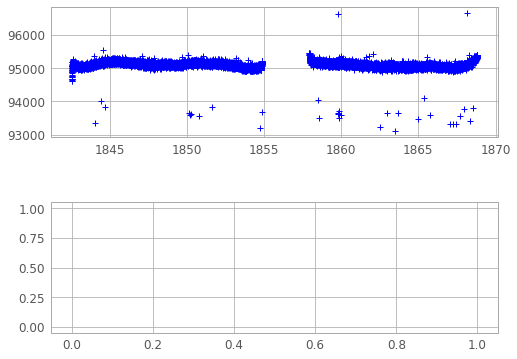

In [5]:
f = np.linspace(0.01, 10, 100000)
pg =signal.lombscargle(tess_bjds, pdcsap_flux, f, normalize = True)
#input data
plt.subplot(2, 1, 1)
plt.plot(tess_bjds, pdcsap_flux, 'b+')

#periodogram
plt.subplot(2, 1, 2)
plt.plot(f, pg)
plt.show()

tess2019357164649-s0020-0000000004132133-0165-s_lc.fits


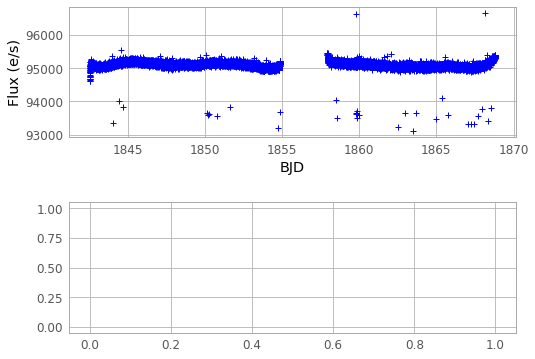

tess2019357164649-s0020-0000000004244059-0165-s_lc.fits


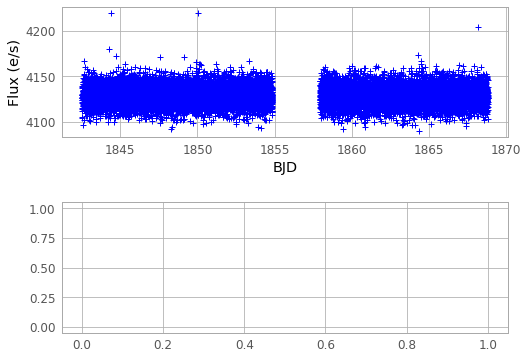

tess2019357164649-s0020-0000000004287518-0165-s_lc.fits


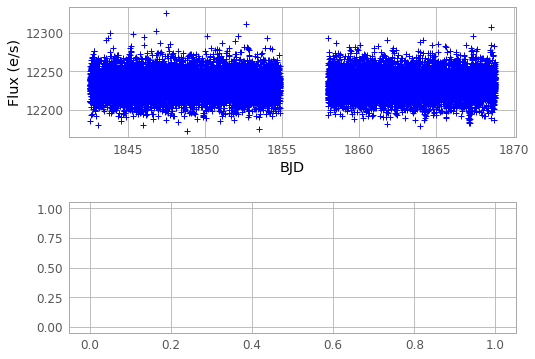

tess2019357164649-s0020-0000000004300927-0165-s_lc.fits


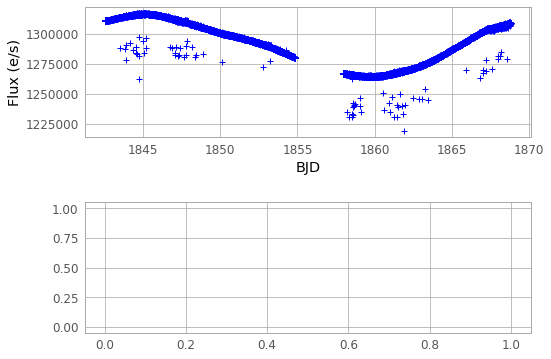

tess2019357164649-s0020-0000000004305219-0165-s_lc.fits


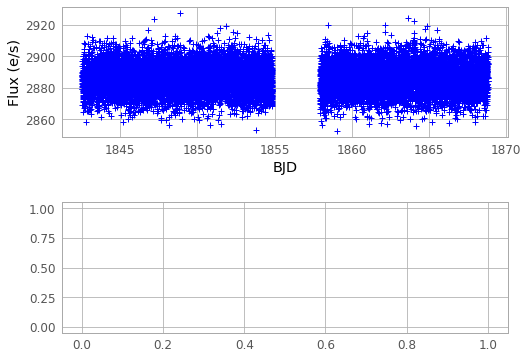

tess2019357164649-s0020-0000000004375248-0165-s_lc.fits


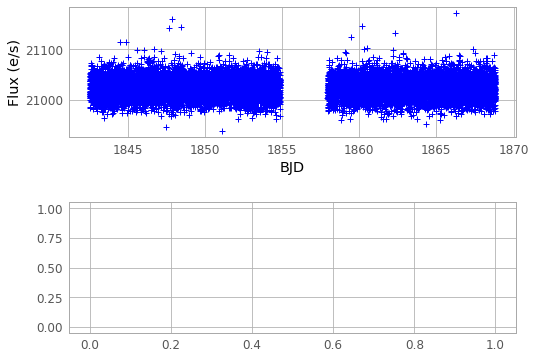

tess2019357164649-s0020-0000000004377008-0165-s_lc.fits


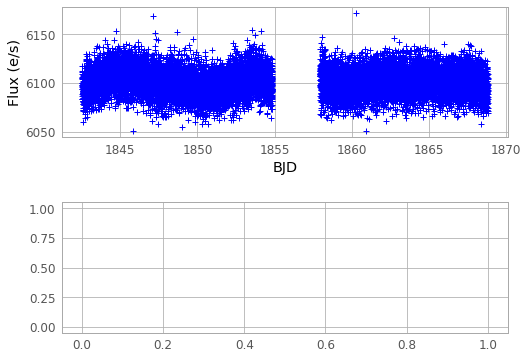

In [ ]:
direc = "/Users/conta/UROP_Spring_2020/tessdata_lc_sector20_1000"
f = np.linspace(0.01, 10, 100000)

for filename in os.listdir(direc):
    if filename.endswith(".fits"): 
        print(filename)
        file = direc + '/' + filename
        #fits.info(file)
        image_data = fits.getdata(file, ext=1)
        fits.getdata(file, ext=1).columns
        with fits.open(file, mode="readonly") as hdulist:
            tess_bjds = hdulist[1].data['TIME']
            sap_flux = hdulist[1].data['SAP_FLUX']
            pdcsap_flux = hdulist[1].data['PDCSAP_FLUX']
        plt.title(filename)
        pg =signal.lombscargle(tess_bjds, pdcsap_flux, f, normalize = True)
        #input data
        plt.subplot(2, 1, 1)
        plt.plot(tess_bjds, pdcsap_flux, 'b+')
        plt.xlabel("BJD")
        plt.ylabel("Flux (e/s)")

        #periodogram
        plt.subplot(2, 1, 2)
        plt.plot(f, pg)
        
        plt.show()
        continue
    else:
        continue

In [6]:
batch_size  = 2000   # >> 1000 lightcurves for each class
test_size   = 50      # >> 25 for each class
num_classes = 1
epochs      = 5
input_dim   = 500     # >> number of data points in light curve
half_batch = int(batch_size/2) #for doing the two halves of the fake data
noise = [0.2] 

# gaussians
height = 20.
center = 15.
stdev  = 10.
xmax   = 30.

def gaussian(datapoints, a, b, c):
    '''a = height, b = position of center, c = stdev'''
    x = np.linspace(0, xmax, datapoints)
    return  a * np.exp(-(x-b)**2 / 2*c**2) + np.random.normal(size=(datapoints))

In [14]:
#producing testing data, same process as above

x_test_flat = 1 + np.random.normal(size = (test_size, input_dim)) #produces a 50x500 item array, which gives the 500 flat data sets their 500 x values
y_test_flat = np.zeros((test_size, num_classes)) #produces a 50x2 array - 50 flat data sets, each with two possible classes. 
if num_classes == 2:
    y_test_flat[:,0] = 1
else:
    y_test_flat[:,0] = 0


# 50 gaussians (class 1)
x_test_bump = np.zeros((test_size, input_dim)) #another 500x500 item array, all zeroes
for i in range(test_size):
    x_test_bump[i] = gaussian(input_dim, a = height, b = center, c = stdev)
    #set the ith value of the x_train to be the gaussian output for that list item
y_test_bump = np.zeros((test_size, num_classes)) #creates y data, 500x2, all zeroes
if num_classes == 2:
    y_test_bump[:,1] = 1
else: 
    y_test_bump[:,0] = 1

#combine each type into one
x_test = np.concatenate((x_test_flat, x_test_bump), axis=0)
y_test = np.concatenate((y_test_flat, y_test_bump), axis=0)

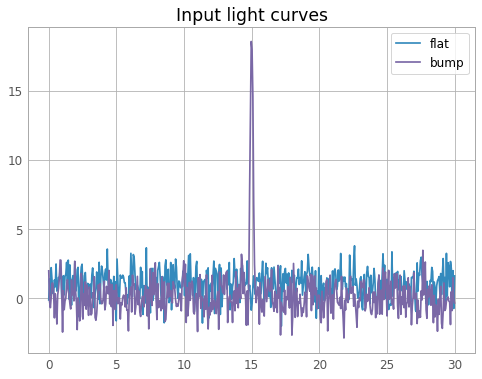

In [15]:
#plotting testing data

plt.ion()
plt.figure(0)
plt.title('Input light curves')
plt.plot(np.linspace(0, xmax, input_dim), x_test[0], '-',
         label = 'flat')
n = int(test_size/2)
plt.plot(np.linspace(0, xmax, input_dim), x_test[int(test_size)], '-',
         label = 'bump')
plt.legend()

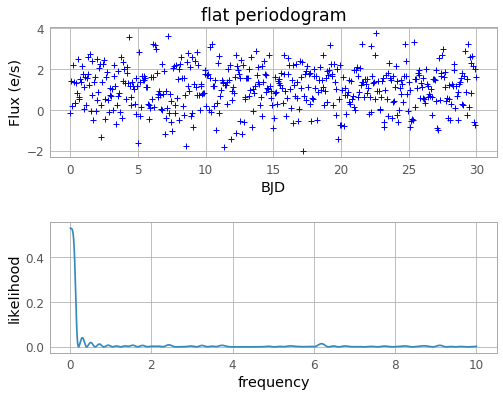

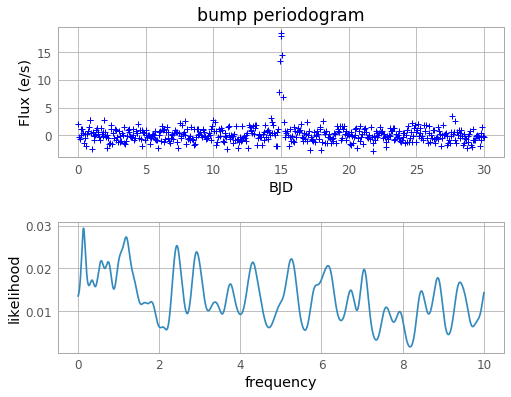

In [19]:
pg =signal.lombscargle(np.linspace(0,xmax, input_dim), x_test[0], f, normalize = True)
#input data
plt.subplot(2, 1, 1)
plt.plot(np.linspace(0,xmax, input_dim), x_test[0], 'b+')
plt.xlabel("BJD")
plt.ylabel("Flux (e/s)")
plt.title("flat periodogram")
#periodogram
plt.subplot(2, 1, 2)
plt.plot(f, pg)
plt.xlabel("frequency")
plt.ylabel("likelihood")
        
plt.show()

pg2 =signal.lombscargle(np.linspace(0,xmax, input_dim), x_test[int(test_size)], f, normalize = True)
#input data
plt.subplot(2, 1, 1)
plt.plot(np.linspace(0,xmax, input_dim), x_test[int(test_size)], 'b+')
plt.xlabel("BJD")
plt.ylabel("Flux (e/s)")
plt.title("bump periodogram")
#periodogram
plt.subplot(2, 1, 2)
plt.plot(f, pg2)
plt.xlabel("frequency")
plt.ylabel("likelihood") 
plt.show()

In [70]:
max_freq = f[pg.argmax()]
max_freq2 = f[pg2.argmax()]
print(max_freq, max_freq2)

0.01 0.14306813068130683


In [58]:
#calculate all moments for a given set of data:

def moments(dataset): 
    moments = []
    #moments.append(moment(dataset, moment = 0)) #total prob, should always be 1
    moments.append(moment(dataset, moment = 1)) # expectation value
    moments.append(moment(dataset, moment = 2)) #variance
    moments.append(moment(dataset, moment = 3)) #skew
    moments.append(moment(dataset, moment = 4)) #kurtosis
    return(moments)

In [59]:
moments(x_test[0])

[0.0, 1.0302531990091515, -0.199166665446799, 3.0745242893893656]

In [60]:
p = moments(x_test[int(test_size)])
print(p)

[0.0, 3.4637858145307256, 35.0147104179762, 584.4842678408158]


In [96]:
def featvec(sampledata): 
    featvec = moments(sampledata)
    
    f = np.linspace(0.01, 20, 100000)
    pg =signal.lombscargle(np.linspace(0, xmax, input_dim), sampledata, f, normalize = True)
    #input data
    plt.subplot(2, 1, 1)
    plt.plot(np.linspace(0,xmax, input_dim), sampledata, 'b+')
    plt.xlabel("BJD")
    plt.ylabel("Flux (e/s)")
    plt.title("data")
    #periodogram
    plt.subplot(2, 1, 2)
    plt.plot(f, pg)
    plt.xlabel("frequency")
    plt.ylabel("likelihood")
    plt.title("periodogram")
    featvec.append(f[pg.argmax()])
    return(featvec)

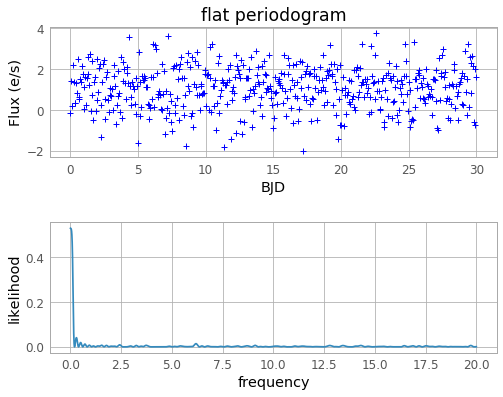

In [94]:
test = featvec(x_test[0])

In [95]:
print(test)

[0.0, 1.0302531990091515, -0.199166665446799, 3.0745242893893656, 0.01]
